In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
from wordcloud import WordCloud


# Loading data

In [2]:
# Load the training dataset from the specified CSV file
train_ds = pd.read_csv("data/train.csv")

# Load the testing dataset from the specified CSV file
test_ds = pd.read_csv("data/test.csv")


# Data description and exploration

In [3]:
# Get the shape of the train_ds DataFrame
train_shape = train_ds.shape

# Print detailed information about the shape of the train_ds DataFrame
print(f"The training dataset has {train_shape[0]} rows and {train_shape[1]} columns.")

# Get the shape of the test_ds DataFrame
test_shape = test_ds.shape

# Print detailed information about the shape of the test_ds DataFrame
print(f"The testing dataset has {test_shape[0]} rows and {test_shape[1]} columns.")

The training dataset has 20800 rows and 5 columns.
The testing dataset has 5200 rows and 4 columns.


In [4]:
# Function to display column titles and explanations
def display_column_info(df, dataset_name):

    print(f"Column information for the {dataset_name} dataset:")
    for column in df.columns:
        # Get the data type of the column
        dtype = df[column].dtype
        
        # Print column title and its data type
        print(f"Column name (type): {column} ({dtype})")
        
        # Add brief explanation of the column content if known
        if column == 'id':
            print("unique id for a news article")
        elif column == 'title':
            print("the title of a news article.")
        elif column == 'author':
            print("author of the news article.")
        elif column == 'text':
            print("the text of the article; could be incomplete")
            
        else:
            print("a label that marks the article as potentially unreliable (1: unreliable; 0: reliable)")
        
        # Print a blank line for separation between column descriptions
        print()
# Display column information for train_ds
display_column_info(train_ds, "train")

# Display column information for test_ds
display_column_info(test_ds, "test")

Column information for the train dataset:
Column name (type): id (int64)
unique id for a news article

Column name (type): title (object)
the title of a news article.

Column name (type): author (object)
author of the news article.

Column name (type): text (object)
the text of the article; could be incomplete

Column name (type): label (int64)
a label that marks the article as potentially unreliable (1: unreliable; 0: reliable)

Column information for the test dataset:
Column name (type): id (int64)
unique id for a news article

Column name (type): title (object)
the title of a news article.

Column name (type): author (object)
author of the news article.

Column name (type): text (object)
the text of the article; could be incomplete



In [5]:
# Generate summary statistics for the training dataset
print("\nSummary statistics for the training dataset:")
train_ds.describe(include='all')




Summary statistics for the training dataset:


,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


In [6]:
# Generate summary statistics for the testing dataset
print("\nSummary statistics for the testing dataset:")
test_ds.describe(include='all')



Summary statistics for the testing dataset:


,id,title,author,text
count,5200.000000,5078,4697,5193
unique,NaN,5056,1732,5126
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,
freq,NaN,2,65,31
mean,23399.500000,NaN,NaN,NaN
std,1501.255031,NaN,NaN,NaN
min,20800.000000,NaN,NaN,NaN
25%,22099.750000,NaN,NaN,NaN
50%,23399.500000,NaN,NaN,NaN
75%,24699.250000,NaN,NaN,NaN


# Identify missing data
There are quite a few missing values within the `text` and `title` columns. These are the two columns in which the majority of our features are. It's worth pointing out that each data point either has missing `title` or `text`, but not both. To address this issue, I will merge the `text` and `title` columns to create a new column.

In [7]:
# Count missing values in each column of the training dataset
missing_train = train_ds.isnull().sum()
print("Missing values in the training dataset:")
print(missing_train)

# Count missing values in each column of the test dataset
missing_test = test_ds.isnull().sum()
print("Missing values in the test dataset:")
print(missing_test)

Missing values in the training dataset:
id           0
title      558
author    1957
text        39
label        0
dtype: int64
Missing values in the test dataset:
id          0
title     122
author    503
text        7
dtype: int64


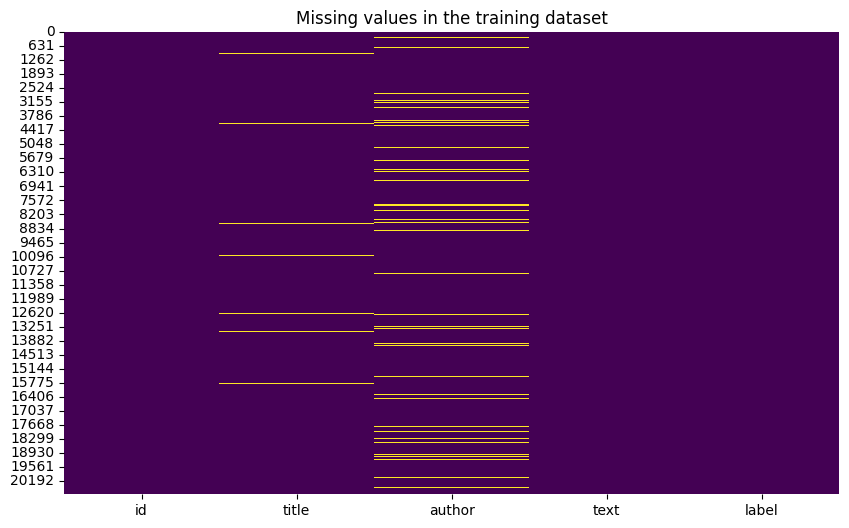

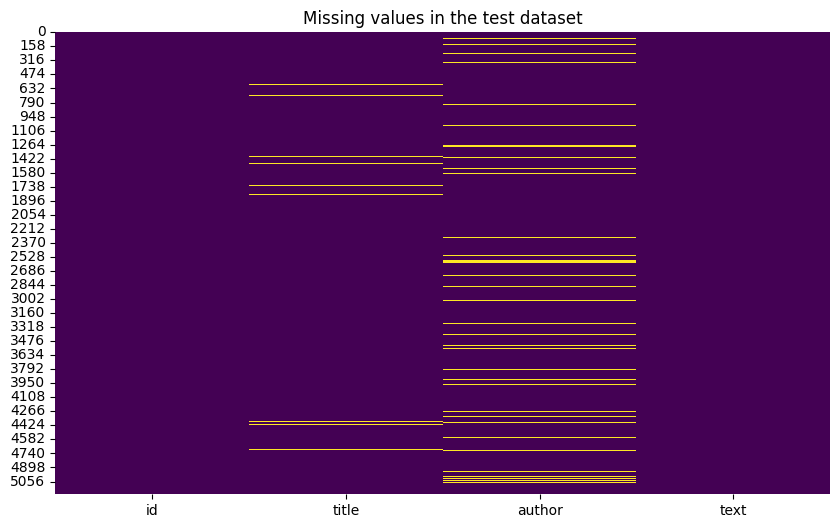

In [8]:
# Visualization of missing values in the training dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train_ds.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the training dataset')
plt.show()

# Visualization of missing values in the test dataset
plt.figure(figsize=(10, 6))
sns.heatmap(test_ds.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the test dataset')
plt.show()

 # Percentage of missing data
 Calculate and display the percentage of missing data for each column


In [9]:
# Percentage of missing data in the training dataset
missing_train_percent = (train_ds.isnull().sum() / len(train_ds)) * 100
print("Percentage of missing values in the training dataset:")
print(missing_train_percent)

# Percentage of missing data in the test dataset
missing_test_percent = (test_ds.isnull().sum() / len(test_ds)) * 100
print("Percentage of missing values in the test dataset:")
print(missing_test_percent)

Percentage of missing values in the training dataset:
id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64
Percentage of missing values in the test dataset:
id        0.000000
title     2.346154
author    9.673077
text      0.134615
dtype: float64


# Determine the IDs of records with missing data


In [ ]:
# Filter records with missing data in any column of the training dataset
missing_train_ids = train_ds[train_ds.isnull().any(axis=1)]['id']
print("IDs of records with missing values in the training dataset:")
print(missing_train_ids)

# Filter records with missing data in any column of the test dataset
missing_test_ids = test_ds[test_ds.isnull().any(axis=1)]['id']
print("IDs of records with missing values in the test dataset:")
print(missing_test_ids)

## Some visualizations


In [ ]:

# Define los colores para cada categoría de label
palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_ds, palette=palette, hue='label', legend=False)
plt.title('Distribution of Articles by Label')
plt.xlabel('Label')
plt.ylabel('Count')

# Añade etiquetas a las barras
label_counts = train_ds['label'].value_counts()
for i, bar in enumerate(plt.gca().patches):
    label_text = 'real' if i == 0 else 'fake'
    plt.gca().annotate(label_text + ' (' + str(label_counts[i]) + ')', 
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                       ha='center', 
                       va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

In [ ]:
# Top 10 authors by article count
top_authors = train_ds['author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.index, y=top_authors.values, palette='viridis')
plt.title('Top 10 Authors by Article Count')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Combine all titles into a single string
all_titles = ' '.join(train_ds['title'].dropna().astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Article Titles')
plt.axis('off')
plt.show()

In [ ]:
def create_new_text(row):
    """
    Creates a new text by concatenating author, title, and text from the input row.

    Args:
    - row (pd.Series): A pandas Series representing a row in the dataset.

    Returns:
    - str: Concatenated string of author, title, and text.
    """
    return row["author"] + " " + row["title"] + " " + row["text"]

# Fill missing values in 'author', 'title', and 'text' columns with empty strings
train_ds["author"] = train_ds["author"].fillna("")
train_ds["title"] = train_ds["title"].fillna("")
train_ds["text"] = train_ds["text"].fillna("")

# Create a new column 'new_text' by applying the create_new_text function to each row in train_ds
train_ds["new_text"] = train_ds.apply(create_new_text, axis=1)

# Fill missing values in 'author', 'title', and 'text' columns with empty strings
test_ds["author"] = test_ds["author"].fillna("")
test_ds["title"] = test_ds["title"].fillna("")
test_ds["text"] = test_ds["text"].fillna("")

# Create a new column 'new_text' by applying the create_new_text function to each row in test_ds
test_ds["new_text"] = test_ds.apply(create_new_text, axis=1)

# Print the first few rows of train_ds to verify the changes
train_ds.head()

# Visualizing Text Lengths

In [ ]:
def get_token_counts(dataset: pd.DataFrame) -> Dict:
    token_counts = {"test": []}
    for _, row in dataset.iterrows():
        token_count = len(row["new_text"].split(" "))
        if "label" in list(dataset.columns):
            if row["label"] not in token_counts:
                token_counts[row["label"]] = [token_count]
            else:
                token_counts[row["label"]].append(token_count)
        else:
            token_counts["test"].append(token_count)
    return token_counts


train_counts = get_token_counts(train_ds.copy())
test_counts = get_token_counts(test_ds.copy())

In [ ]:
train_avg_length = int((sum(train_counts[0]) + sum(train_counts[1])) / (len(train_counts[1]) + len(train_counts[0])))
train_max_length = max(max(train_counts[0]), max(train_counts[1]))
train_min_length = min(min(train_counts[0]), min(train_counts[1]))

test_avg_length = int(sum(test_counts["test"]) / len(test_counts["test"]))
test_max_length = max(test_counts["test"])
test_min_length = min(test_counts["test"])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

sns.histplot(train_counts[0] + train_counts[1], kde=True, color="blue", bins=1000, ax=axes[0])
axes[0].axvline(train_min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {train_min_length}')
axes[0].axvline(train_max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {train_max_length}')
axes[0].axvline(train_avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {train_avg_length:.2f}')
axes[0].set_title("Text length distribution (train)")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(-100, 3000)
axes[0].legend()

sns.histplot(test_counts["test"], kde=True, color="purple", bins=1000, ax=axes[1])
axes[1].axvline(test_min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {test_min_length}')
axes[1].axvline(test_max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {test_max_length}')
axes[1].axvline(test_avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {test_avg_length:.2f}')
axes[1].set_title("Text length distribution (test)")
axes[1].set_xlabel("Text Length")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(-100, 3000)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
bin_width = 10
bins = range(
    min(min(train_counts[0]), min(train_counts[1])), 
    max(max(train_counts[0]), max(train_counts[1])) + bin_width, 
    bin_width
)

plt.figure(figsize=(14, 5))
sns.histplot(train_counts[1], kde=True, color="red", bins=bins, label="Fake")
sns.histplot(train_counts[0], kde=True, color="green", bins=bins, label="Real")
plt.title("Text length distribution (train)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xlim(left=-20, right=2000)
plt.legend()
plt.tight_layout()
plt.show()